<a href="https://colab.research.google.com/github/singhsourav0/Machine-Learning-Algorithms/blob/main/change_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="cyan">Support Vector Machine(SVM)</font></h1>
<h4><font color="teal">Support Vector Machines (SVM) are a type of supervised learning algorithm used for classification and regression tasks. One of the key features of SVM is its ability to use different kernels to handle non-linearly separable data. Two commonly used kernels are the Radial Basis Function (RBF) kernel and the polynomial kernel.</font></h4>
<h3><font color=""><b>singhsourav0...</b></font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=.1, noise=.1)

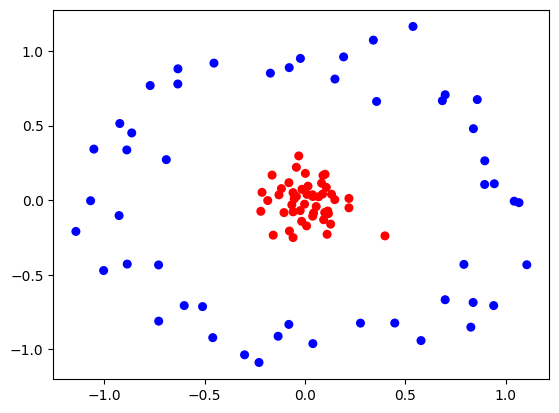

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

In [12]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-12-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


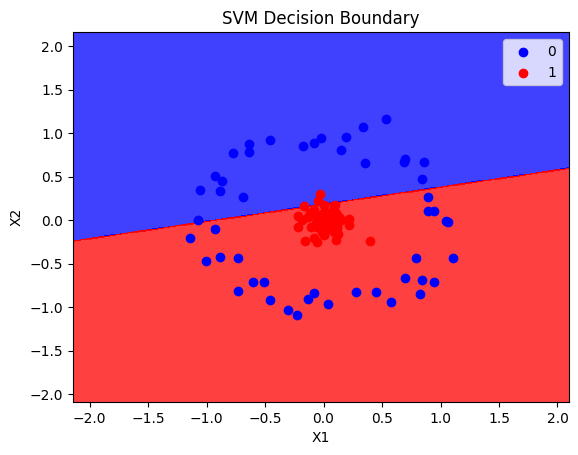

In [13]:
plot_decision_boundary(X, y, classifier)

In [14]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

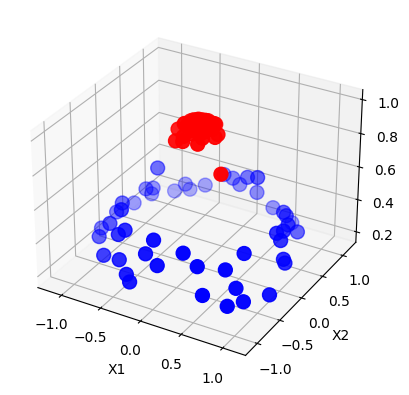

In [15]:
plot_3d_plot(X,y)

<h1><font color="cyan">RBF Kernel:</font></h1>
<h4><font color="teal">The Radial Basis Function kernel, also known as the Gaussian kernel, is commonly used in SVM because of its flexibility in capturing complex decision boundaries. The RBF kernel defines the similarity between two points in the feature space as a Gaussian function of the Euclidean distance between them.</font></h4>


In [16]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)


In [17]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-12-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


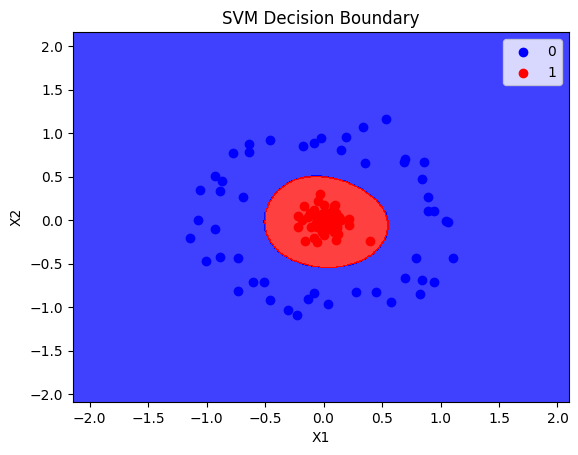

In [18]:
plot_decision_boundary(X, y, rbf_classifier)

<h1><font color="cyan">Polynomial Kernel:</font></h1>
<h4><font color="teal">The polynomial kernel is another commonly used kernel in SVM. It computes the similarity between two points as the inner product raised to a certain power d, often referred to as the degree of the polynomial.
</font></h4>


In [19]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-12-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


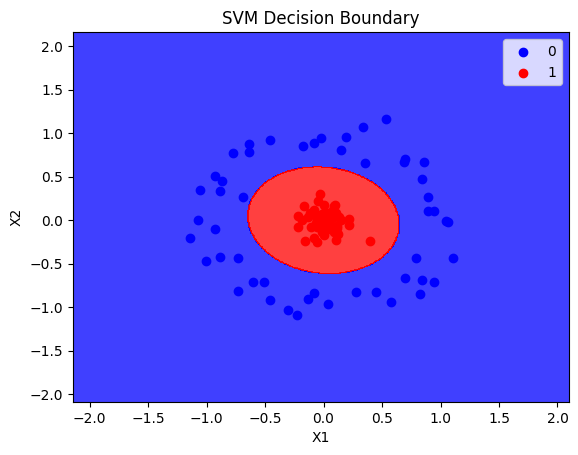

In [21]:
plot_decision_boundary(X, y, poly_classifier)